In [1]:
import os
import json
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [15]:
decore_filepath = "../predictions/xsum/pred_XSum_DeCoReEntropy_90.json"
baseline_filepath = "../predictions/xsum/pred_XSum_Baseline.json"
dola_filepath = "../predictions/xsum/pred_XSum_DoLa_high.json"

decore_data = []
with open(decore_filepath, "r") as f:
    for line in f:
        decore_data += [json.loads(line)]

baseline_data = []
with open(baseline_filepath, "r") as f:
    for line in f:
        baseline_data += [json.loads(line)]

dola_data = []
with open(dola_filepath, "r") as f:
    for line in f:
        dola_data += [json.loads(line)]

decore_alphas = [decore_data[i]["alphas"] for i in range(len(decore_data))]
decore_lengths = [len(decore_alphas[i]) for i in range(len(decore_alphas))]

baseline_alphas = [baseline_data[i]["alphas"] for i in range(len(baseline_data))]
baseline_lengths = [len(baseline_alphas[i]) for i in range(len(baseline_alphas))]

dola_alphas = [dola_data[i]["alphas"][0] for i in range(len(dola_data))]
dola_lengths = [len(dola_alphas[i]) for i in range(len(dola_alphas))]

In [16]:
# decore_alphas = np.array(decore_alphas)
# decore_lengths = np.array(decore_lengths)

# baseline_alphas = np.array(baseline_alphas)
# baseline_lengths = np.array(baseline_lengths)

# dola_alphas = np.array(dola_alphas)
# dola_lengths = np.array(dola_lengths)

/var/folders/k0/rfk7_0gj54j49sqn7mhwx7qm0000gp/T/ipykernel_55560/3254115913.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='Timestep', y='Alpha', hue="Type", data=df, ci=95, ax=ax1)
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need

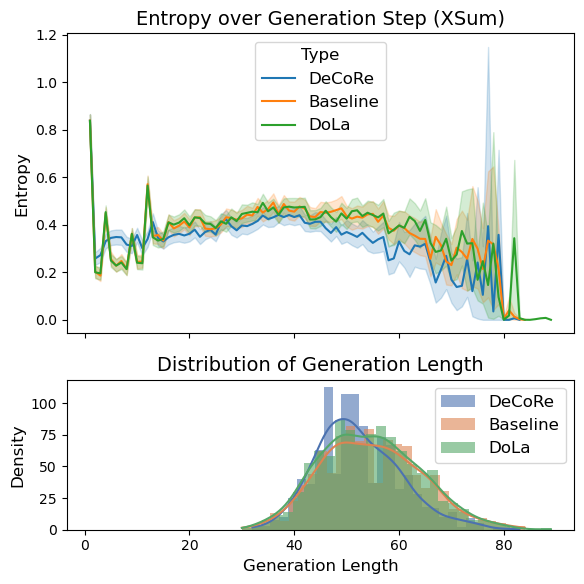

In [22]:
# Convert the data to a long-form DataFrame suitable for Seaborn
# decore_timesteps = np.tile(np.arange(1, decore_max_seq_len + 1), 1000)
# baseline_timesteps = np.tile(np.arange(1, baseline_max_seq_len + 1), 1000)
# dola_timesteps = np.tile(np.arange(1, dola_max_seq_len + 1), 1000)
decore_timesteps = np.concatenate([np.arange(1, length+1) for length in decore_lengths])
baseline_timesteps = np.concatenate([np.arange(1, length+1) for length in baseline_lengths])
dola_timesteps = np.concatenate([np.arange(1, length+1) for length in dola_lengths])
timesteps = np.concatenate((decore_timesteps, baseline_timesteps, dola_timesteps))
# print(timesteps)
# print(len(timesteps))
# print(decore_alphas)
decore_data_flat = np.concatenate([np.array(alphas) for alphas in decore_alphas])
baseline_data_flat = np.concatenate([np.array(alphas) for alphas in baseline_alphas])
dola_data_flat = np.concatenate([np.array(alphas) for alphas in dola_alphas])

types = ['DeCoRe'] * len(decore_data_flat) + ['Baseline'] * len(baseline_data_flat) + ['DoLa'] * len(dola_data_flat)

data_flat = np.concatenate((decore_data_flat, baseline_data_flat, dola_data_flat))

df = pd.DataFrame({
    'Timestep': timesteps,
    'Alpha': data_flat,
    'Type': types
})

# Set font sizes
plt.rcParams.update({
    'font.size': 12,         # General font size
    'axes.titlesize': 14,    # Title font size
    'axes.labelsize': 12,    # Axis label font size
    'xtick.labelsize': 10,   # X-tick label font size
    'ytick.labelsize': 10,   # Y-tick label font size
    'legend.fontsize': 12,   # Legend font size
    'figure.titlesize': 14   # Figure title font size
})

# Create the figure and subplots with adjusted height ratios
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), sharex=True, gridspec_kw={'height_ratios': [4, 2]})

# Plot the alpha line plot on the first subplot
sns.lineplot(x='Timestep', y='Alpha', hue="Type", data=df, ci=95, ax=ax1)
ax1.set_ylabel('Entropy')
# ax1.set_ylim(0, 1)
ax1.tick_params(axis='y')
ax1.set_title('Entropy over Generation Step (XSum)')

# Plot the histogram on the second subplot
sns.histplot(decore_lengths, kde=True, bins=30, color='#4C72B0', ax=ax2, edgecolor=None, label='DeCoRe', alpha=0.6)
sns.histplot(baseline_lengths, kde=True, bins=30, color='#DD8452', ax=ax2, edgecolor=None, label='Baseline', alpha=0.6)
sns.histplot(dola_lengths, kde=True, bins=30, color='#55A868', ax=ax2, edgecolor=None, label='DoLa', alpha=0.6)
ax2.set_xlabel('Generation Length')
ax2.set_ylabel('Density')
ax2.legend(loc='upper right')
ax2.set_title('Distribution of Generation Length')

# Adjust layout to make room for titles and labels
plt.tight_layout()

# Save the figure as a PDF with settings suitable for ICLR publication
plt.savefig('xsum_llama3_8b_instruct_decore_entropy_alpha_generation_step.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Show the plot
# plt.grid(True)
plt.show()

/var/folders/k0/rfk7_0gj54j49sqn7mhwx7qm0000gp/T/ipykernel_55560/883664637.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='Timestep', y='Alpha', hue="Type", data=df, ci=95, ax=ax1)
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need 

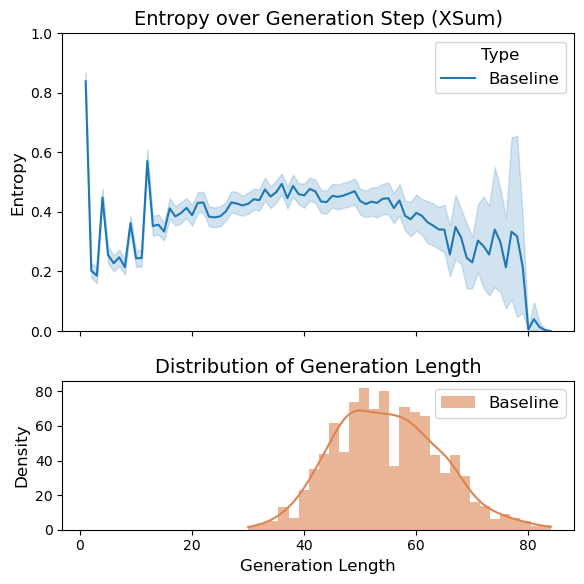

In [23]:
timesteps = np.concatenate([np.arange(1, length+1) for length in baseline_lengths])
data_flat = np.concatenate([np.array(alphas) for alphas in baseline_alphas])

types = ['Baseline'] * len(data_flat)

df = pd.DataFrame({
    'Timestep': timesteps,
    'Alpha': data_flat,
    'Type': types
})

# Set font sizes
plt.rcParams.update({
    'font.size': 12,         # General font size
    'axes.titlesize': 14,    # Title font size
    'axes.labelsize': 12,    # Axis label font size
    'xtick.labelsize': 10,   # X-tick label font size
    'ytick.labelsize': 10,   # Y-tick label font size
    'legend.fontsize': 12,   # Legend font size
    'figure.titlesize': 14   # Figure title font size
})

# Create the figure and subplots with adjusted height ratios
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), sharex=True, gridspec_kw={'height_ratios': [4, 2]})

# Plot the alpha line plot on the first subplot
sns.lineplot(x='Timestep', y='Alpha', hue="Type", data=df, ci=95, ax=ax1)
ax1.set_ylabel('Entropy')
ax1.set_ylim(0, 1)
ax1.tick_params(axis='y')
ax1.set_title('Entropy over Generation Step (XSum)')

# Plot the histogram on the second subplot
sns.histplot(baseline_lengths, kde=True, bins=30, color='#DD8452', ax=ax2, edgecolor=None, label='Baseline', alpha=0.6)
ax2.set_xlabel('Generation Length')
ax2.set_ylabel('Density')
ax2.legend(loc='upper right')
ax2.set_title('Distribution of Generation Length')

# Adjust layout to make room for titles and labels
plt.tight_layout()

# # Save the figure as a PDF with settings suitable for ICLR publication
# plt.savefig('xsum_llama3_8b_instruct_decore_entropy_alpha_generation_step.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Show the plot
# plt.grid(True)
plt.show()

In [24]:
def auec(entropy_values):
    return np.trapz(entropy_values, range(len(entropy_values)))

In [25]:
decore_auecs = []
for alphas in decore_alphas:
    decore_auecs += [auec(alphas)]

baseline_auecs = []
for alphas in baseline_alphas:
    baseline_auecs += [auec(alphas)]

dola_auecs = []
for alphas in dola_alphas:
    dola_auecs += [auec(alphas)]


print("DeCoRe AUEC:", np.mean(decore_auecs))
print("Baseline AUEC:", np.mean(baseline_auecs))
print("DoLa AUEC:", np.mean(dola_auecs))

DeCoRe AUEC: 19.463187477373896
Baseline AUEC: 21.757776589979695
DoLa AUEC: 21.71028781493401


In [28]:
decore_ses = []
for alphas in decore_alphas:
    decore_ses += [sum(alphas)/len(alphas)]

baseline_ses = []
for alphas in baseline_alphas:
    baseline_ses += [sum(alphas)/len(alphas)]

dola_ses = []
for alphas in dola_alphas:
    dola_ses += [sum(alphas)/len(alphas)]


print("DeCoRe Averaged Length-controlled Entropy:", np.mean(decore_ses))
print("Baseline Averaged Length-controlled Entropy:", np.mean(baseline_ses))
print("DoLa Averaged Length-controlled Entropy:", np.mean(dola_ses))

DeCoRe Averaged Length-controlled Entropy: 0.38277756070888613
Baseline Averaged Length-controlled Entropy: 0.4074109776386283
DoLa Averaged Length-controlled Entropy: 0.4087630708566204


/var/folders/k0/rfk7_0gj54j49sqn7mhwx7qm0000gp/T/ipykernel_55560/2338003771.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='Timestep', y='Alpha', hue="Type", data=df, ci=95, ax=ax1)
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need

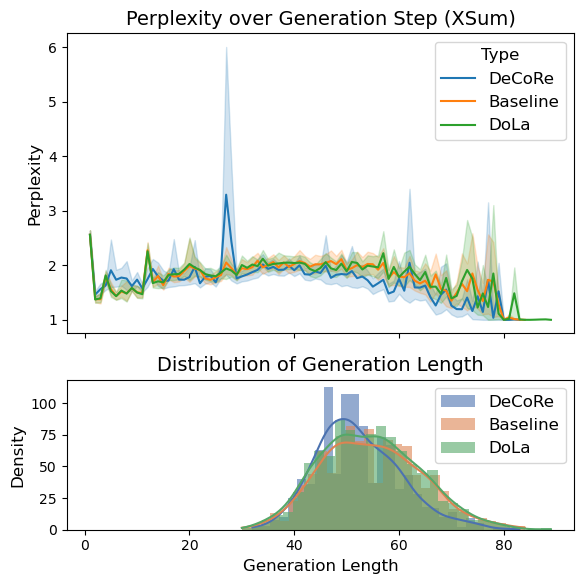

Baseline AUPC: 100.45604634448115
DoLa AUPC: 100.04943345439699
DeCoRe AUPC: 95.22739667848354
Baseline Average Perplexity: 1.8714146962028404
DoLa Average Perplexity: 1.8758531993563898
DeCoRe Average Perplexity: 1.8725806864952637


In [21]:
def calculate_perplexity(alphas):
    return np.exp(alphas)


decore_timesteps = np.concatenate([np.arange(1, length+1) for length in decore_lengths])
baseline_timesteps = np.concatenate([np.arange(1, length+1) for length in baseline_lengths])
dola_timesteps = np.concatenate([np.arange(1, length+1) for length in dola_lengths])
timesteps = np.concatenate((decore_timesteps, baseline_timesteps, dola_timesteps))
decore_data_flat = np.concatenate([np.array(alphas) for alphas in decore_alphas])
baseline_data_flat = np.concatenate([np.array(alphas) for alphas in baseline_alphas])
dola_data_flat = np.concatenate([np.array(alphas) for alphas in dola_alphas])

types = ['DeCoRe'] * len(decore_data_flat) + ['Baseline'] * len(baseline_data_flat) + ['DoLa'] * len(dola_data_flat)

data_flat = np.concatenate((decore_data_flat, baseline_data_flat, dola_data_flat))
data_flat = calculate_perplexity(data_flat)

df = pd.DataFrame({
    'Timestep': timesteps,
    'Alpha': data_flat,
    'Type': types
})

# Set font sizes
plt.rcParams.update({
    'font.size': 12,         # General font size
    'axes.titlesize': 14,    # Title font size
    'axes.labelsize': 12,    # Axis label font size
    'xtick.labelsize': 10,   # X-tick label font size
    'ytick.labelsize': 10,   # Y-tick label font size
    'legend.fontsize': 12,   # Legend font size
    'figure.titlesize': 14   # Figure title font size
})

# Create the figure and subplots with adjusted height ratios
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), sharex=True, gridspec_kw={'height_ratios': [4, 2]})

# Plot the alpha line plot on the first subplot
sns.lineplot(x='Timestep', y='Alpha', hue="Type", data=df, ci=95, ax=ax1)
ax1.set_ylabel('Perplexity')
# ax1.set_ylim(0, 1)
ax1.tick_params(axis='y')
ax1.set_title('Perplexity over Generation Step (XSum)')

# Plot the histogram on the second subplot
sns.histplot(decore_lengths, kde=True, bins=30, color='#4C72B0', ax=ax2, edgecolor=None, label='DeCoRe', alpha=0.6)
sns.histplot(baseline_lengths, kde=True, bins=30, color='#DD8452', ax=ax2, edgecolor=None, label='Baseline', alpha=0.6)
sns.histplot(dola_lengths, kde=True, bins=30, color='#55A868', ax=ax2, edgecolor=None, label='DoLa', alpha=0.6)
ax2.set_xlabel('Generation Length')
ax2.set_ylabel('Density')
ax2.legend(loc='upper right')
ax2.set_title('Distribution of Generation Length')

# Adjust layout to make room for titles and labels
plt.tight_layout()

# Save the figure as a PDF with settings suitable for ICLR publication
plt.savefig('xsum_perplexity.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Show the plot
# plt.grid(True)
plt.show()

decore_aupcs = []
decore_avg_perplexities = []
for alphas in decore_alphas:
    decore_perplexities = calculate_perplexity(alphas)
    decore_aupcs += [auec(decore_perplexities)]
    decore_avg_perplexities += [np.mean(decore_perplexities)]

baseline_aupcs = []
baseline_avg_perplexities = []
for alphas in baseline_alphas:
    baseline_perplexities = calculate_perplexity(alphas)
    baseline_aupcs += [auec(baseline_perplexities)]
    baseline_avg_perplexities += [np.mean(baseline_perplexities)]

dola_aupcs = []
dola_avg_perplexities = []
for alphas in dola_alphas:
    dola_perplexities = calculate_perplexity(alphas)
    dola_aupcs += [auec(dola_perplexities)]
    dola_avg_perplexities += [np.mean(dola_perplexities)]


print("Baseline AUPC:", np.mean(baseline_aupcs))
print("DoLa AUPC:", np.mean(dola_aupcs))
print("DeCoRe AUPC:", np.mean(decore_aupcs))

print("Baseline Average Perplexity:", np.mean(baseline_avg_perplexities))
print("DoLa Average Perplexity:", np.mean(dola_avg_perplexities))
print("DeCoRe Average Perplexity:", np.mean(decore_avg_perplexities))

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C


def gp_model(entropy_sequences):
    X = []
    y = []
    for sequence in entropy_sequences:
        for time, entropy in sequence:
            X.append(time)
            y.append(entropy)

    X = np.array(X).reshape(-1, 1)
    y = np.array(y)

    kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

    gp.fit(X, y)

    X_pred = np.linspace(0, 5, 100).reshape(-1, 1)
    y_pred, sigma = gp.predict(X_pred, return_std=True)

    plt.figure()
    plt.plot(X, y, 'r.', markersize=10, label='Observations')
    plt.plot(X_pred, y_pred, 'b-', label='Prediction')
    plt.fill_between(X_pred.ravel(), 
                    y_pred - 1.96 * sigma, 
                    y_pred + 1.96 * sigma, 
                    alpha=0.2, color='blue', label='95% Confidence Interval')
    plt.xlabel('Time')
    plt.ylabel('Entropy')
    plt.legend(loc='upper left')
    plt.show()

In [30]:
decore_alphas_with_token_id = []

for alphas in decore_alphas:
    decore_alphas_with_token_id += [[(i, alpha) for i, alpha in enumerate(alphas)]]

# gp_model(decore_alphas_with_token_id)

<Axes: >

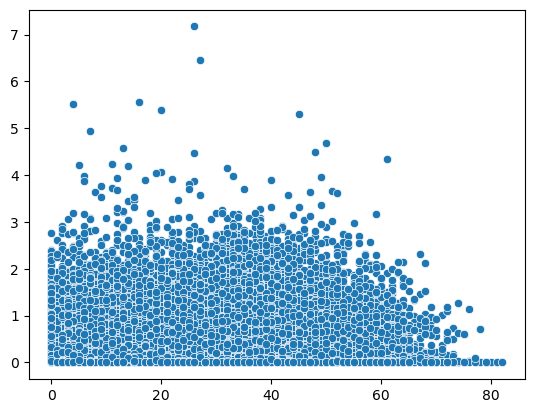

In [31]:
X = []
y = []
for sequence in decore_alphas_with_token_id:
    for time, entropy in sequence:
        X.append(time)
        y.append(entropy)

sns.scatterplot(x=X, y=y)
# sns.kdeplot(x=X, y=y)

In [7]:
X = []
y = []
for sequence in decore_alphas_with_token_id:
    for time, entropy in sequence:
        X.append(time)
        y.append(np.exp(entropy))

sns.swarmplot(x=X, y=y)

/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/categori

KeyboardInterrupt: 

In [3]:
decore_filepath = "../predictions/xsum/pred_XSum_DeCoReEntropy.json"
baseline_filepath = "../predictions/xsum/pred_XSum_Baseline.json"
dola_filepath = "../predictions/xsum/pred_XSum_DoLa_high.json"

decore_data = []
with open(decore_filepath, "r") as f:
    for line in f:
        decore_data += [json.loads(line)]

baseline_data = []
with open(baseline_filepath, "r") as f:
    for line in f:
        baseline_data += [json.loads(line)]

dola_data = []
with open(dola_filepath, "r") as f:
    for line in f:
        dola_data += [json.loads(line)]

decore_predicted_answers = [decore_data[i]["predicted_answer"] for i in range(len(decore_data))]
decore_alphas = [decore_data[i]["alphas"] for i in range(len(decore_data))]
decore_lengths = [len(decore_alphas[i]) for i in range(len(decore_alphas))]

baseline_predicted_answers = [baseline_data[i]["predicted_answer"] for i in range(len(baseline_data))]
baseline_alphas = [baseline_data[i]["alphas"] for i in range(len(baseline_data))]
baseline_lengths = [len(baseline_alphas[i]) for i in range(len(baseline_alphas))]

dola_predicted_answers = [dola_data[i]["predicted_answer"] for i in range(len(dola_data))]
dola_alphas = [dola_data[i]["alphas"][0] for i in range(len(dola_data))]
dola_lengths = [len(dola_alphas[i]) for i in range(len(dola_alphas))]

In [10]:
from transformers import AutoTokenizer

def get_entropy_per_sentence(answer, token_entropies):
    # Initialize your tokenizer (replace 'model_name' with your specific model name)
    tokenizer = AutoTokenizer.from_pretrained('meta-llama/Meta-Llama-3-8B-instruct')

    print(tokenizer("\n"))
    print(tokenizer("\n\n"))
    # Tokenize the text using LlamaTokenizer
    tokens = tokenizer.tokenize(answer)
    tokenized_ids = tokenizer.convert_tokens_to_ids(tokens)

    token_entropies = token_entropies[:-1]
    print(len(token_entropies))

    assert len(tokenized_ids) == len(token_entropies), "Length mismatch between tokens and entropies"

    # Token ID for the period "."
    split_token_ids = [13, 198]  # This is commonly the ID for ".", but ensure it matches your specific tokenizer

    # To store the maximum entropy for each sentence
    sentence_entropies = []
    current_sentence_entropies = []

    # Iterate over the tokens and their entropies
    for i, (token_id, entropy) in enumerate(zip(tokenized_ids, token_entropies)):
        current_sentence_entropies.append(entropy)
        
        if token_id in split_token_ids:
            # Calculate the max entropy for the current sentence
            sentence_entropies.append([current_sentence_entropies])
            
            # Reset for the next sentence
            current_sentence_entropies = []

    # If there are any remaining entropies after the last period, calculate for the last sentence
    if current_sentence_entropies:
        sentence_entropies.append([current_sentence_entropies])

    # Display the results
    for idx, entropy in enumerate(sentence_entropies):
        print(f"Sentence {idx + 1}: Max Entropy = {entropy}")

In [11]:
for answer, entropy in zip(decore_predicted_answers, decore_alphas):
    print(answer)
    get_entropy_per_sentence(answer, entropy)
    break
    

Prison Link Cymru, a charity that helps people find accommodation after their release, claims that investing in housing for ex-offenders would be cheaper than jailing homeless repeat offenders, as many struggle to find suitable accommodation, with some living rough for up to a year.


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'input_ids': [128000, 198], 'attention_mask': [1, 1]}
{'input_ids': [128000, 271], 'attention_mask': [1, 1]}
55
Sentence 1: Max Entropy = [[0.9087905883789062, 0.0027384713757783175, 0.10258494317531586, 9.119011679104005e-07, 3.0254473131208215e-06, 1.2033390248689102e-06, 1.0, 0.0006406893953680992, 0.18156997859477997, 1.0, 0.03176295757293701, 0.8308066129684448, 0.02666538394987583, 0.047053877264261246, 0.004849715624004602, 0.7874146699905396, 0.002255877247080207, 0.4193447530269623, 1.0, 0.003823011415079236, 1.0, 6.759693405911094e-06, 0.05175109580159187, 0.5689705610275269, 0.24525494873523712, 0.01002153567969799, 8.258484012912959e-05, 0.13094431161880493, 0.002263089641928673, 0.18203142285346985, 0.19200821220874786, 0.7094728946685791, 2.2088224795879796e-05, 0.9159858226776123, 0.00510236993432045, 9.956552821677178e-05, 0.534392237663269, 1.0, 1.0, 1.0, 0.0070965345948934555, 0.0302209984511137, 0.23018905520439148, 0.4154646396636963, 1.0, 0.5409698486328125, 0.241